# L03: Quiet days analysis

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np


# our library
import i4s_lib as i4s

folder='i4s_geomag_data/'
month='201303'

# observatories used in Dst index
obs=['her','hon','kak','sjg']
# quiet days of the month
qs=['08','07','26','25','13']
# variable to contain all the values (1440 minutes) of all four observatories,
# for the five quiet days
dat = np.zeros([len(obs),len(qs),1440])

# read all the quiet days of the month for each observatory (only the H component (c1))
for o in obs:
    for q in qs:
        filename=o + month + q + '*min.min'
        df=i4s.read_im(filepattern=filename,folder=folder)
        data=df['data']
        dat[obs.index(o)][qs.index(q)][:]=data.c1

# Let's analize some quiet days data

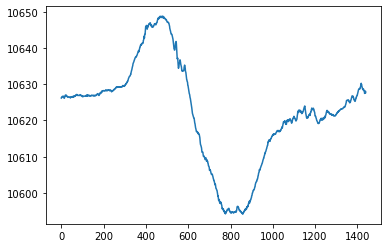

In [2]:
# first observatory HER, first day 10 (10-03-2015)
plt.plot(dat[0][0][:]);

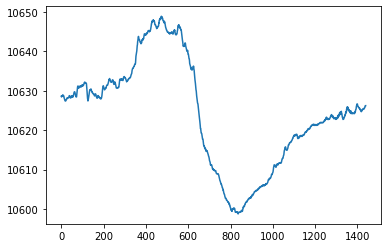

In [3]:
# first observatory HER, second day 30 (30-03-2015)
plt.plot(dat[0][1][:]);

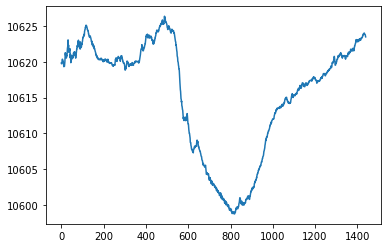

In [4]:
# first observatory HER, third day 05 (05-03-2015)
plt.plot(dat[0][2][:]);

## Q01: What pattern do you observe on HER quiet days?
### A01:

## Q02: Why do they have that shape?, use the system of currents Sq in order to answer that question
### R02:

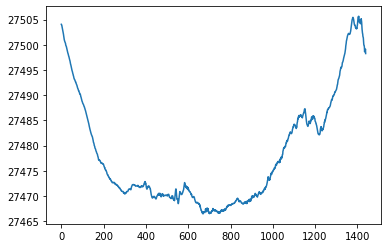

In [5]:
# second observatory HON, firs day  (10-03-2015)
plt.plot(dat[1][0][:]);

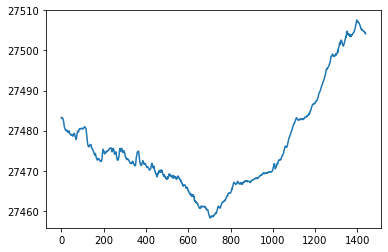

In [6]:
# second observatory HON, second day  (30-03-2015)
plt.plot(dat[1][1][:]);

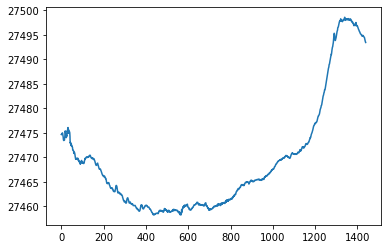

In [7]:
# second observatory HON, third day  (05-03-2015)
plt.plot(dat[1][2][:]);

## Q03: What pattern do you observe for that quiet days in HON? Be carerful because the local time of HON is not the same that in HER
### A03:

## Q04: Indicate wether the shape follows that expected from the Solar Quiet system of currents
### A04:

## Q05: Could you come up with a way to know the beginning of the local day for each of the observatories?
### A05:

In [8]:
# Obtain the longitudes for the four observatories
lons=['','','','']
for o in obs:
        filename=o + month + q + '*min.min'
        df=i4s.read_im(filepattern=filename,folder=folder)
        lons[obs.index(o)]=df['lon']
print(obs)
print(lons)

['her', 'hon', 'kak', 'sjg']
['19.225', '202.000', '140.186', '293.850']


### If we observe the longitudes, some of them have values greater than 180, that is, between 0 and 360. 
### Let's convert those longitudes greater than 180 to negative values, that is, between -180 and 180:

In [9]:
lons = [(float(lon) + 180) % 360 - 180 for lon in lons]
print(obs)
print(lons)

['her', 'hon', 'kak', 'sjg']
[19.224999999999994, -158.0, 140.18600000000004, -66.14999999999998]


## Q06: What does negative values mean?

### A06:

### Let's shift the data the number of minutes corresponding to its position in longitude

-632


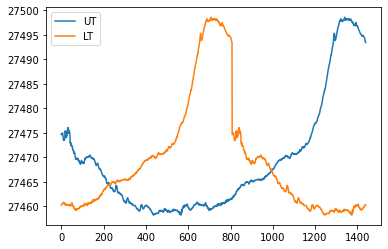

In [10]:
# Get a day of HON data and we plot them
# These data is centered in the day with reference to UT time
hon=dat[1][2][:]
plt.plot(hon, label='UT');

# shift the data a number of data points corresponding to the longitude
lon=lons[1]
mins=int(lon / 360 * 1440)
hon_lt=np.roll(hon,mins)

# show the shifted data, meaning centered on the local time
plt.plot(hon_lt, label='LT');
print(mins)

plt.legend();

## Q07: Any inconvenience in using this operation to shift the data?

### A07: 